Tasks:

- Creating and interpreting high-level summaries of the data

- Finding outliers and removing these (if applicable)

- Checking data formats and correcting (if applicable)


You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to **draw insights on who spends on chips and what drives spends for each customer segment**. Remember, our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
transaction = pd.read_csv('QVI_transaction_data.csv')

### Purchase Behaviour

In [191]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


- LYLTY_CARD_NBR: loyalty card number 

- LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

- PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [192]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [193]:
purchase.describe(include ='all').round(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,72637.00,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,136185.93,NaN,NaN
std,89892.93,NaN,NaN
min,1000.00,NaN,NaN
25%,66202.00,NaN,NaN
50%,134040.00,NaN,NaN
75%,203375.00,NaN,NaN


In [194]:
purchase['LYLTY_CARD_NBR'].nunique()

72637

No null $\rightarrow$ doesn't need cleaning

LYLY_CARD_NBR: can't have outliers (similar to an ID)

In [195]:
purchase['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

<Axes: xlabel='LIFESTAGE', ylabel='Count'>

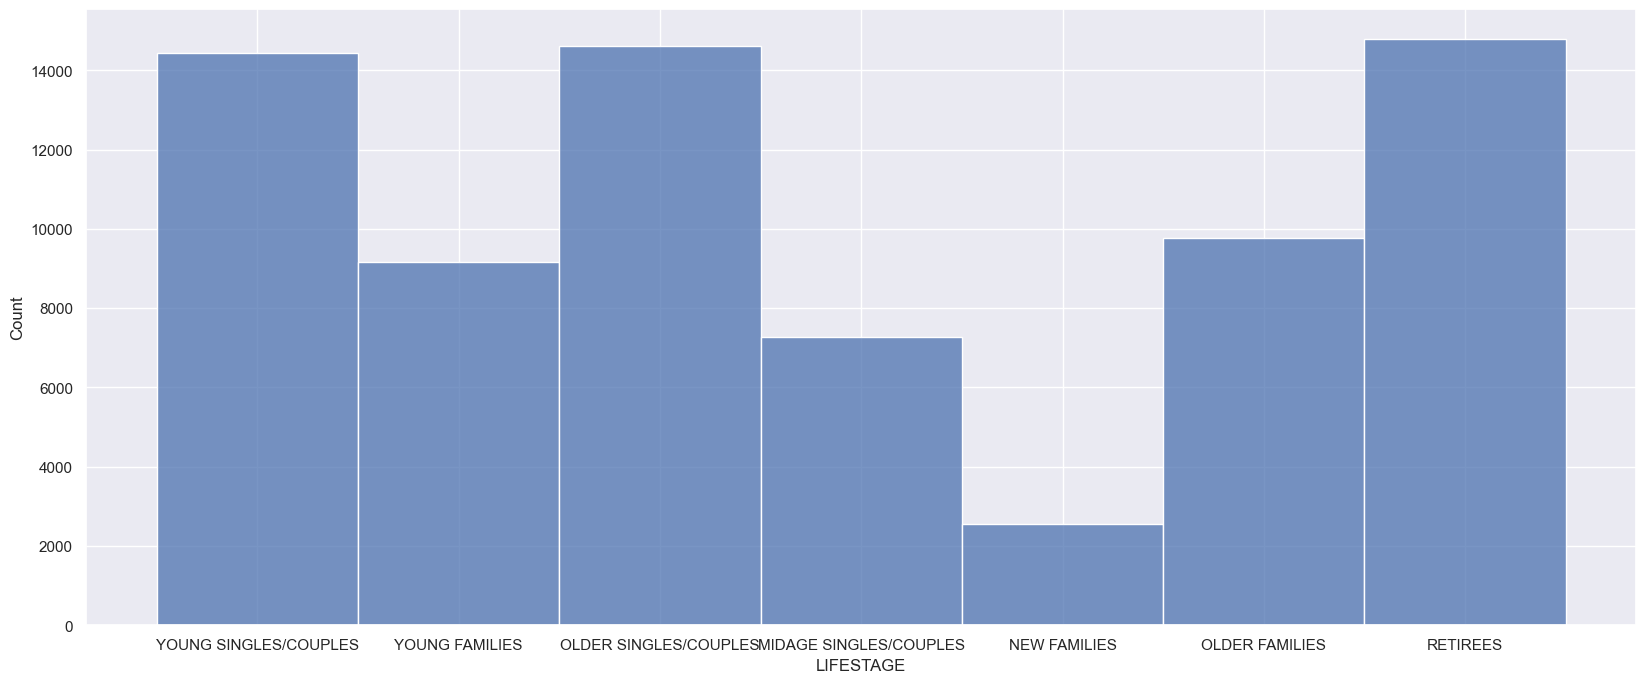

In [196]:
sns.set_theme(rc={'figure.figsize':(20,8)})
sns.histplot(purchase['LIFESTAGE'])

([<matplotlib.patches.Wedge at 0x282c9e710>,
 [Text(0.8820918503599302, 0.657201618629013, 'RETIREES'),
  Text(-0.3685995579118257, 1.0364045377685331, 'OLDER SINGLES/COUPLES'),
  Text(-1.099589081641277, -0.030064123724020408, 'YOUNG SINGLES/COUPLES'),
  Text(-0.5233956450661755, -0.967500386938301, 'OLDER FAMILIES'),
  Text(0.35025445933678395, -1.0427472434462233, 'YOUNG FAMILIES'),
  Text(0.9462172838224407, -0.560957085520526, 'MIDAGE SINGLES/COUPLES'),
  Text(1.0933220057309005, -0.12102475690767187, 'NEW FAMILIES')],
 [Text(0.4811410092872346, 0.3584736101612798, '20.38%'),
  Text(-0.20105430431554125, 0.5653115660555635, '20.11%'),
  Text(-0.5997758627134238, -0.016398612940374764, '19.88%'),
  Text(-0.28548853367245935, -0.5277274837845277, '13.46%'),
  Text(0.19104788691097305, -0.56877122369794, '12.64%'),
  Text(0.516118518448604, -0.30597659210210504, '10.02%'),
  Text(0.5963574576714002, -0.066013503767821, '3.51%')])

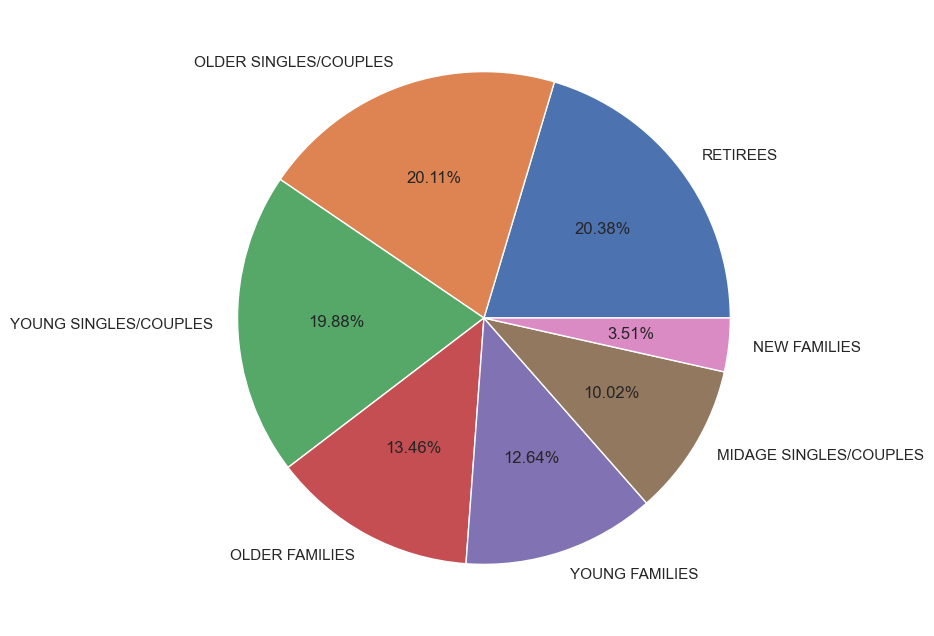

In [197]:
label1 = ['RETIREES',
'OLDER SINGLES/COUPLES',
'YOUNG SINGLES/COUPLES',
'OLDER FAMILIES',
'YOUNG FAMILIES',
'MIDAGE SINGLES/COUPLES',
'NEW FAMILIES']
plt.pie(purchase['LIFESTAGE'].value_counts(),labels = label1,autopct='%.2f%%')

Most customers are retireers, following by older single/ couples and young single/couples.

In [198]:
purchase['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

<Axes: xlabel='PREMIUM_CUSTOMER', ylabel='Count'>

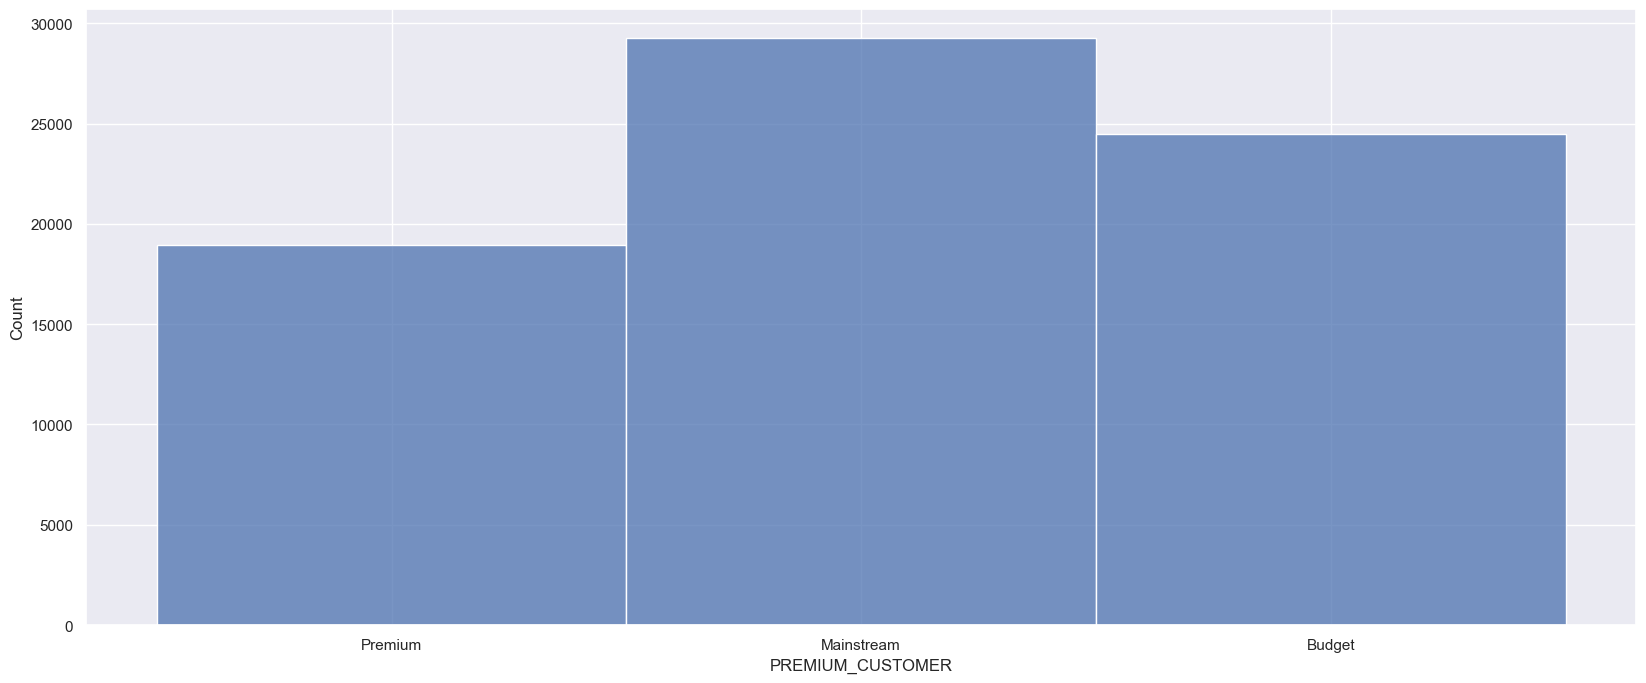

In [199]:
sns.histplot(purchase['PREMIUM_CUSTOMER'])

([<matplotlib.patches.Wedge at 0x281fdb1d0>,
 [Text(0.3313012950599338, 1.048922996168742, 'Premium'),
  Text(-0.9921718718009669, -0.47496839558750203, 'Mainstream'),
  Text(0.7517391805770921, -0.8030493162846739, 'Budget')],
 [Text(0.1807097973054184, 0.572139816092041, '40.26%'),
  Text(-0.5411846573459819, -0.25907367032045564, '33.69%'),
  Text(0.4100395530420502, -0.4380268997916403, '26.05%')])

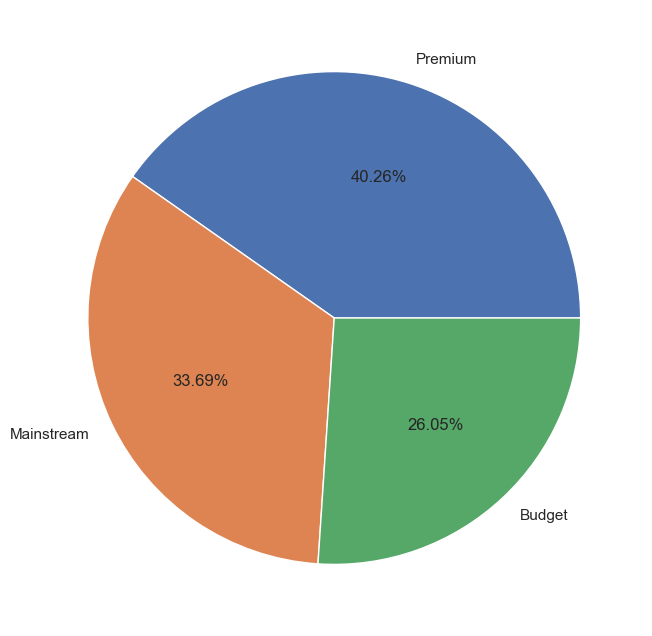

In [200]:
label2 = ['Premium','Mainstream','Budget']
plt.pie(purchase['PREMIUM_CUSTOMER'].value_counts(),labels = label2,autopct='%.2f%%')

Most customers are Mainstream, following by Budget and finally Premium.

### Transaction Data

In [201]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [202]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [203]:
transaction.describe(include = 'all').round(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.00,264836.00,264836.00,264836.00,264836.00,264836,264836.00,264836.00
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.04,135.08,135549.48,135158.31,56.58,NaN,1.91,7.30
std,105.39,76.78,80579.98,78133.03,32.83,NaN,0.64,3.08
min,43282.00,1.00,1000.00,1.00,1.00,NaN,1.00,1.50
25%,43373.00,70.00,70021.00,67601.50,28.00,NaN,2.00,5.40
50%,43464.00,130.00,130357.50,135137.50,56.00,NaN,2.00,7.40
75%,43555.00,203.00,203094.25,202701.25,85.00,NaN,2.00,9.20


No null 

Should change date format for better intepretation

PROD_QTY have a large range (min 2 and max 200) so there's potential outliers that might affect the analysis.

In [204]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'],origin='1899-12-30', unit='D')

In [205]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [206]:
transaction['DATE'].value_counts()

DATE
2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: count, Length: 364, dtype: int64

<Axes: xlabel='DATE', ylabel='Count'>

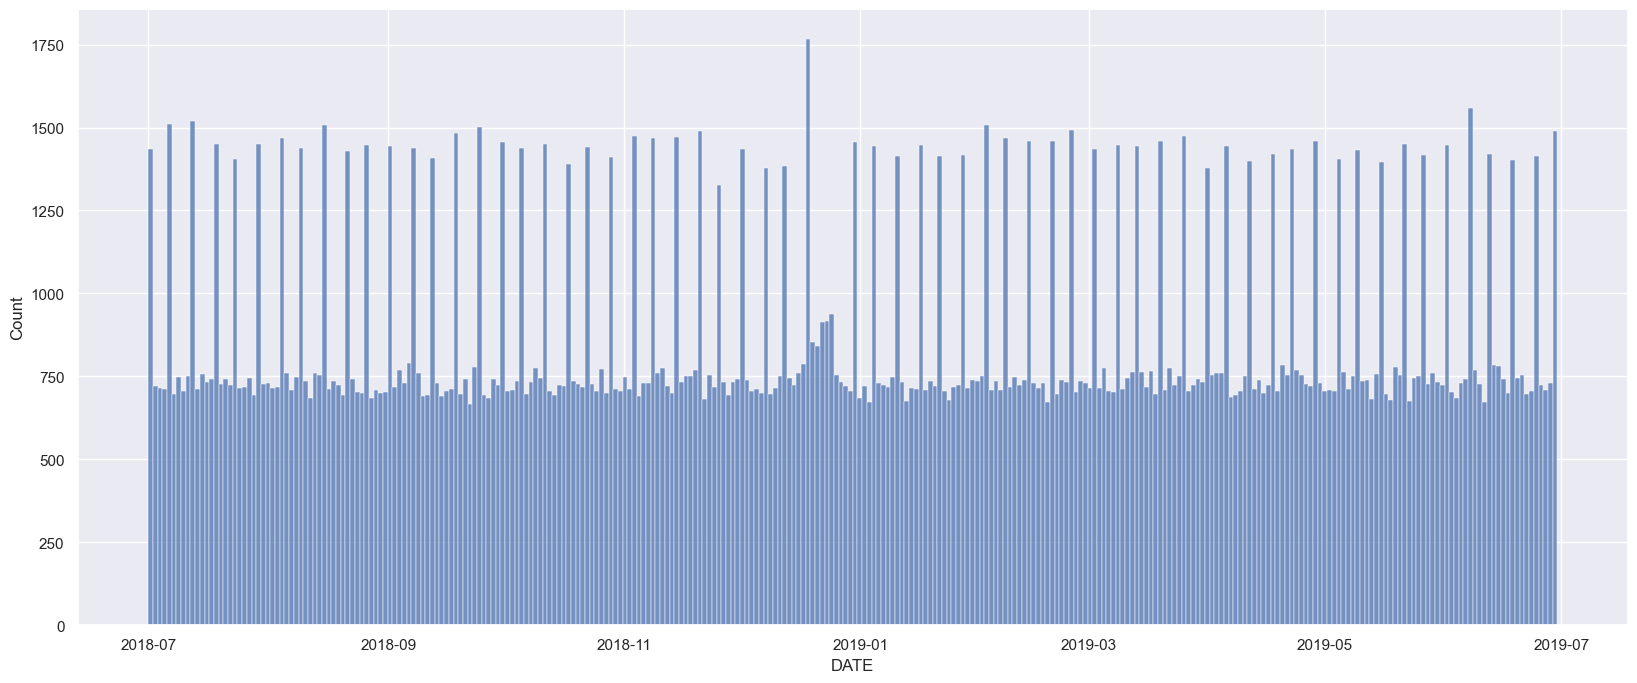

In [207]:
sns.histplot(transaction['DATE'], bins = 300)

The highest number of transaction occurs at the end of the year (Christmas Eve). Moreover, over the period, after a few days, the number of transactions will occasionally double. Further analysis on these days can help understand this buying pattern.

In [208]:
transaction['DATE'].nunique()

364

The data is collected in a year (missing one day- the store might close that day)

In [209]:
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(transaction['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

On Christmas (2018-12-25), the store closed so there was no data.

In [210]:
transaction['STORE_NBR'].nunique()

272

There are 272 stores in total.

In [211]:
transaction['LYLTY_CARD_NBR'].nunique() #matches with the purchase dataset

72637

In [212]:
transaction['PROD_QTY'].value_counts()

PROD_QTY
2      236039
1       27518
5         450
3         430
4         397
200         2
Name: count, dtype: int64

In [213]:
outlier = transaction[transaction['PROD_QTY'] == 200]
outlier

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [214]:
customer_outlier = transaction[transaction['LYLTY_CARD_NBR']== 226000]
customer_outlier

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There's one customer that buy 200 Dorito Corn Chp Supreme 380g twice during the period. He or she might be a retailer, buying the chips to sell at his or her store. I will remove this because bulk buying is not coming.

In [215]:
transaction = transaction.drop([69762,69763])

In [216]:
transaction['PROD_QTY'].value_counts()

PROD_QTY
2    236039
1     27518
5       450
3       430
4       397
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x281f0c750>,
 [Text(-1.0364490318674762, 0.3684744283406534, '2'),
  Text(1.030748553126235, -0.3841320348892724, '1'),
  Text(1.099657406478289, -0.02745156420759464, '5'),
  Text(1.0998840523278188, -0.015970955980657564, '3'),
  Text(1.0999878025205465, -0.0051801839754275925, '4')],
 [Text(-0.5653358355640778, 0.20098605182217458, '89.13%'),
  Text(0.5622264835234009, -0.20952656448505763, '10.39%'),
  Text(0.5998131308063394, -0.014973580476869803, '0.17%'),
  Text(0.5999367558151738, -0.008711430534904124, '0.16%'),
  Text(0.599993346829389, -0.0028255548956877775, '0.15%')])

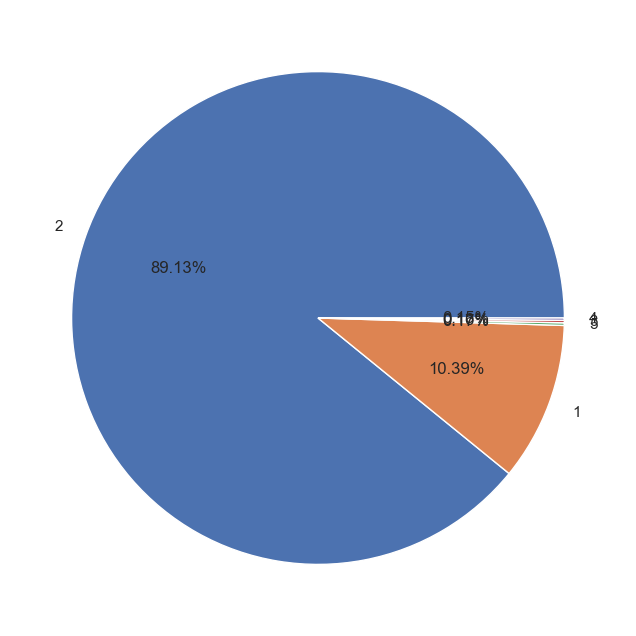

In [217]:
label3 = ['2','1','5','3','4']
plt.pie(transaction['PROD_QTY'].value_counts(),labels = label3,autopct='%.2f%%')

Most customers buy 2 packages of chip per transactions (89%). Might increase sales volume or encourage customers using promotion (ex: buy one get one half price).

In [218]:
store_totalsales = transaction.groupby('STORE_NBR')['PROD_QTY'].sum().reset_index()
store_totalsales = store_totalsales.sort_values(by="PROD_QTY")
store_totalsales

,STORE_NBR,PROD_QTY
75,76,2
91,92,2
251,252,2
205,206,2
10,11,2
...,...,...
42,43,3519
164,165,3602
92,93,3639
87,88,3718


Store 226 has the highest number of chips sold (4401 chips), following by store 87. This can be due to the store's location or marketing strategy or the skills of the employees (better training/ employees with many years of experience).

In [219]:
print(transaction['PROD_NAME'].nunique())
transaction['PROD_NAME'].value_counts()

114


PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

There are 114 products in total.

In [220]:
transaction['Weight'] = transaction['PROD_NAME'].apply(lambda x: x.split()[-1])
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,SeaSalt175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g


The product are not labelled in a uniform format. I will do some editing for easier interpretation and analysis.

In [221]:
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Twisties Chicken270g', 
    'Twisties Chicken 270g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Natural Chip        Compny SeaSalt175g', 
    'Natural Chip        Compny SeaSalt 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Natural ChipCo      Hony Soy Chckn175g', 
    'Natural ChipCo      Hony Soy Chckn 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Old El Paso Salsa   Dip Chnky Tom Ht300g', 
    'Old El Paso Salsa   Dip Chnky Tom Ht 300g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Smiths Crinkle Cut  Chips Chs&Onion170g', 
    'Smiths Crinkle Cut  Chips Chs&Onion 170g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Smiths Thinly       Swt Chli&S/Cream175G', 
    'Smiths Thinly       Swt Chli&S/Cream 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Smiths Chip Thinly  CutSalt/Vinegr175g', 
    'Smiths Chip Thinly  CutSalt/Vinegr 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Kettle 135g Swt Pot Sea Salt', 
    'Kettle Swt Pot Sea Salt 135g')
transaction['Weight'] = transaction['PROD_NAME'].apply(lambda x: x.split()[-1])
transaction['Brand'] = transaction['PROD_NAME'].apply(lambda x: x.split()[0])

In [222]:
weight_totalsales = transaction.groupby('Weight')['PROD_QTY'].sum().reset_index()
weight = weight_totalsales.sort_values(by = 'PROD_QTY', ascending=False)
print(weight)
weight['Weight'].unique()

   Weight  PROD_QTY
9    175g    126467
5    150g     79330
2    134g     48019
0    110g     42835
8    170g     38088
7    165g     29051
18   300g     28813
19   330g     23999
20   380g     12273
17   270g     12049
12   200g      8425
3    135g      6212
16   250g      6069
14   210g      6031
13   210G      5931
22    90g      5692
11   190g      5673
6    160g      5604
15   220g      2970
21    70g      2855
4    150G      2844
10   180g      2764
1    125g      2730


array(['175g', '150g', '134g', '110g', '170g', '165g', '300g', '330g',
       '380g', '270g', '200g', '135g', '250g', '210g', '210G', '90g',
       '190g', '160g', '220g', '70g', '150G', '180g', '125g'],
      dtype=object)

Some of the weight are labeled incorrectly (G instead of g)

In [223]:
transaction['Weight'] = transaction['Weight'].replace(
    '210G', 
    '210g')
transaction['Weight'] = transaction['Weight'].replace(
    '150G', 
    '150g')
weight_totalsales1 = transaction.groupby('Weight')['PROD_QTY'].sum().reset_index()
weight1 = weight_totalsales1.sort_values(by = 'PROD_QTY', ascending=False)
print(weight1)
weight1['Weight'].unique()

   Weight  PROD_QTY
8    175g    126467
4    150g     82174
2    134g     48019
0    110g     42835
7    170g     38088
6    165g     29051
16   300g     28813
17   330g     23999
18   380g     12273
15   270g     12049
12   210g     11962
11   200g      8425
3    135g      6212
14   250g      6069
20    90g      5692
10   190g      5673
5    160g      5604
13   220g      2970
19    70g      2855
9    180g      2764
1    125g      2730


array(['175g', '150g', '134g', '110g', '170g', '165g', '300g', '330g',
       '380g', '270g', '210g', '200g', '135g', '250g', '90g', '190g',
       '160g', '220g', '70g', '180g', '125g'], dtype=object)

([<matplotlib.patches.Wedge at 0x28879d650>,
 [Text(0.7764316149258481, 0.7792008389007545, '175g'),
  Text(-0.541828772531255, 0.9572991075193132, '150g'),
  Text(-1.0670485971139485, 0.2672214276534621, '134g'),
  Text(-1.044115406055749, -0.3461546169517871, '110g'),
  Text(-0.7473646706346042, -0.8071220781810083, '170g'),
  Text(-0.3554863670196776, -1.040975236431276, '165g'),
  Text(0.034194217214751174, -1.0994683967759467, '300g'),
  Text(0.387308604928744, -1.029559150582496, '330g'),
  Text(0.6079539723954345, -0.916728949825744, '380g'),
  Text(0.7392539532556445, -0.8145572985345485, '270g'),
  Text(0.8522989561853166, -0.6954038318023708, '210g'),
  Text(0.9334535981494952, -0.5819487779021112, '200g'),
  Text(0.9825281188166614, -0.494609437571295, '135g'),
  Text(1.0174308208696832, -0.41813218573131017, '250g'),
  Text(1.0452878472417757, -0.34259789317602973, '90g'),
  Text(1.0668887301920598, -0.2678589878820093, '190g'),
  Text(1.0830477545827277, -0.192373494258724

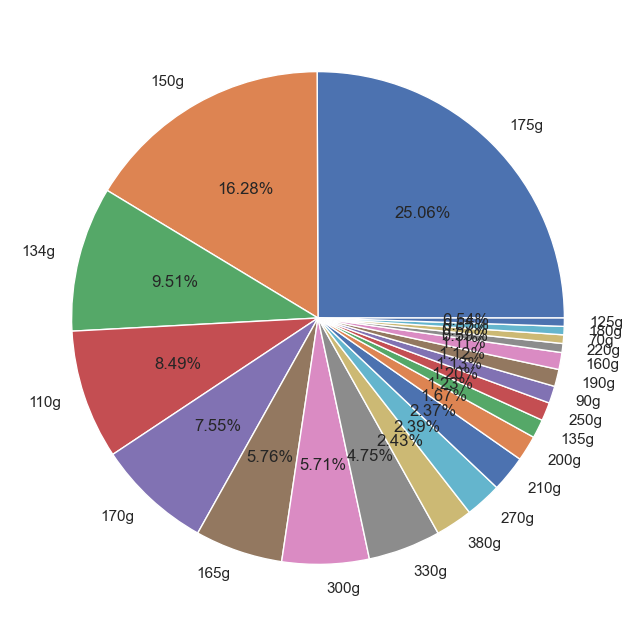

In [224]:
label4 = ['175g', '150g', '134g', '110g', '170g', '165g', '300g', '330g',
       '380g', '270g', '210g', '200g', '135g', '250g', '90g', '190g',
       '160g', '220g', '70g', '180g', '125g']
plt.pie(weight1['PROD_QTY'],labels = label4,autopct='%.2f%%')

25.06% of sales are chips that weigh 175g, following by 150g and 134g. 125g and 180g chips have the lowest sales over the period.

In [225]:
product_totalsales = transaction.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index()
product_totalsales

,PROD_NAME,PROD_QTY
0,Burger Rings 220g,2970
1,CCs Nacho Cheese 175g,2839
2,CCs Original 175g,2880
3,CCs Tasty Cheese 175g,2890
4,Cheetos Chs & Bacon Balls 190g,2801
...,...,...
109,WW Sour Cream &OnionStacked Chips 160g,2802
110,WW Supreme Cheese Corn Chips 200g,2837
111,Woolworths Cheese Rings 190g,2872
112,Woolworths Medium Salsa 300g,2700


In [226]:
product_totalsales = product_totalsales.sort_values(by='PROD_QTY')
product_totalsales

,PROD_NAME,PROD_QTY
21,French Fries Potato Chips 175g,2643
105,WW Crinkle Cut Original 175g,2666
43,NCC Sour Cream & Garden Chives 175g,2682
112,Woolworths Medium Salsa 300g,2700
62,RRD Pc Sea Salt 165g,2702
...,...,...
98,Tostitos Splash Of Lime 175g,6234
10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256
8,Cobs Popd Sea Salt Chips 110g,6277
42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309


<Axes: xlabel='PROD_NAME', ylabel='PROD_QTY'>

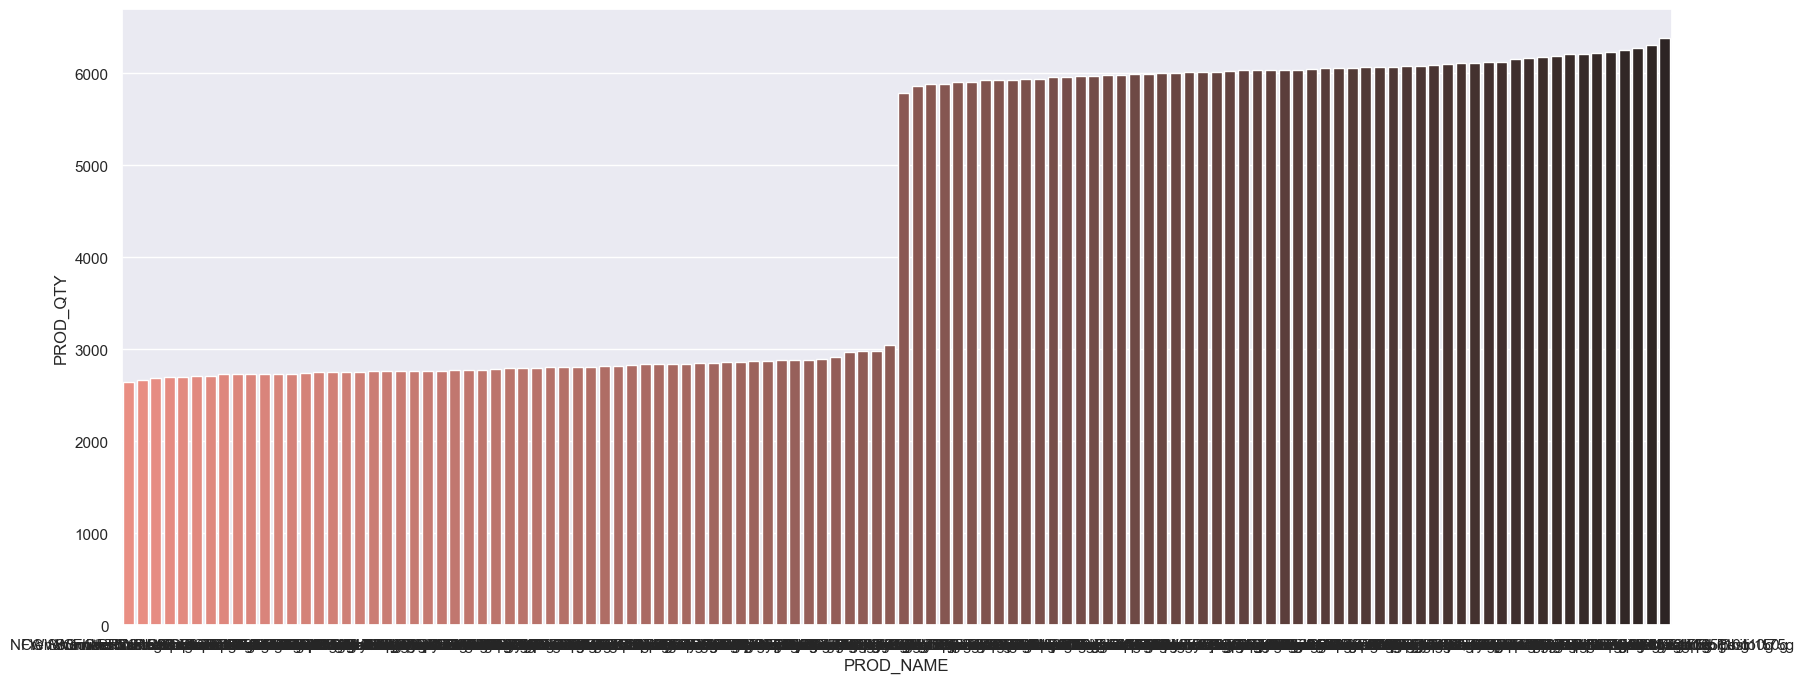

In [227]:
sns.set_theme(rc={'figure.figsize':(20,8)})
sns.barplot(x = product_totalsales['PROD_NAME'], y = product_totalsales['PROD_QTY'],palette ='dark:salmon_r')

In [228]:
count1 = product_totalsales[product_totalsales['PROD_QTY']>6000]
count1.count()

PROD_NAME    37
PROD_QTY     37
dtype: int64

In [229]:
37/114*100

32.45614035087719

In [230]:
count2 = product_totalsales[product_totalsales['PROD_QTY']<3000]
count2.count()

PROD_NAME    56
PROD_QTY     56
dtype: int64

In [231]:
56/114*100

49.122807017543856

Kettle Mozzarella Basil & Pesto 175g has the highest sales over the period, following by Kettle Mozzarella Basil & Pesto 175g, whereas French Fries Potato Chips 175g 300g has the lowest sales.

32.46% (37 products) of the products have sales higher than 6000 units. 49.12% (56 products) have sales lower than 3000 units. From the bar plot, it's clear that the sales of these chips are split into two groups: sales around 3000 units and sales around 6000 units. Further analysis can be done to identify whether there's a specific brand that has higher sales than others. 

In [232]:
transaction['Brand'] = transaction['PROD_NAME'].apply(lambda x: x.split()[0])

In [233]:
brand_totalsales = transaction.groupby('Brand')['PROD_QTY'].sum().reset_index()
brand_totalsales = brand_totalsales.sort_values(by = 'PROD_QTY')
brand_totalsales

,Brand,PROD_QTY
7,French,2643
13,NCC,2682
22,Sunbites,2706
9,GrnWves,2764
0,Burger,2970
21,Snbts,2986
2,Cheetos,5530
19,Smith,5609
11,Infzns,6000
5,Dorito,6109


Some brands are written in multiple ways. I will change them to the same format.

NCC = Natural (Natural Chip Co) 

RRD = Red (Red Rock Deli)

Snbts = Sunbites

Infzns = Infuzions

Grain = GrnWves 

WW = Woolworths

Dorito = Doritos

In [234]:
transaction['Brand'] = transaction['Brand'].replace(
    'NCC', 
    'Natural')
transaction['Brand'] = transaction['Brand'].replace(
    'RRD', 
    'Red')
transaction['Brand'] = transaction['Brand'].replace(
    'Snbts', 
    'Sunbites')
transaction['Brand'] = transaction['Brand'].replace(
    'Infzns', 
    'Infuzions')
transaction['Brand'] = transaction['Brand'].replace(
    'Grain', 
    'GrnWves')
transaction['Brand'] = transaction['Brand'].replace(
    'WW', 
    'Woolworths')
transaction['Brand'] = transaction['Brand'].replace(
    'Dorito', 
    'Doritos')

In [235]:
brand_totalsales = transaction.groupby('Brand')['PROD_QTY'].sum().reset_index()
brand_totalsales = brand_totalsales.sort_values(by = 'PROD_QTY')
brand_totalsales

,Brand,PROD_QTY
6,French,2643
0,Burger,2970
2,Cheetos,5530
14,Smith,5609
16,Sunbites,5692
1,CCs,8609
3,Cheezels,8747
20,Tyrrells,12298
10,Natural,14106
7,GrnWves,14726


<Axes: xlabel='Brand', ylabel='PROD_QTY'>

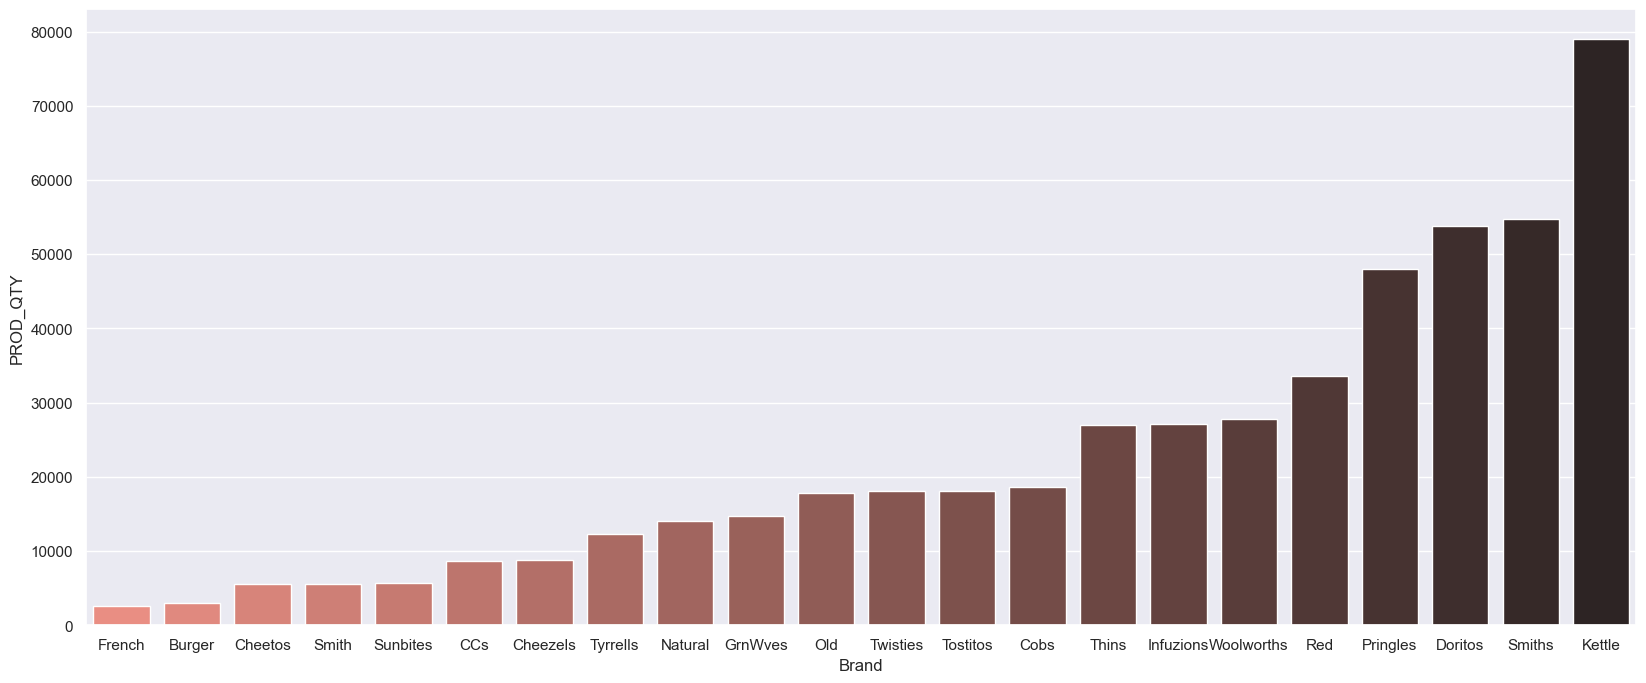

In [236]:
sns.barplot(x = brand_totalsales['Brand'], y = brand_totalsales['PROD_QTY'],palette ='dark:salmon_r')

Kettle has the highest sales compare to other brands with the top two flavours being Kettle Tortilla ChpsHny&Jlpno Chili 150g and Kettle Mozzarella Basil & Pesto 175g (based on product_totalsales). Conversely, French Fries has the lowest sales which might be because the brand only has one product- French Fries Potato Chips 175g.